Задание:
1) Исследуйте зависимость тестовой ошибки от количества деревьев в ансамбле для алгоритма bagging на наборе данных Organics. Постройте график зависимости тестовой ошибки при числе деревьев, равном 1, 11, 21, . . . , 301, объясните полученные результаты.

In [22]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score, train_test_split, StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.ensemble import BaggingClassifier
from matplotlib import pyplot as plt

In [23]:
data = pd.read_csv('C:/Users/One/Downloads/Dataset/dataframe_ORGANICS/ORGANICS.csv', delimiter=',')
data.head()

,ID,DemAffl,DemAge,DemCluster,DemClusterGroup,DemGender,DemReg,DemTVReg,PromClass,PromSpend,PromTime,TargetBuy,TargetAmt
0,140,10.0,76.0,16.0,C,U,Midlands,Wales & West,Gold,16000.00,4.0,0,0
1,620,4.0,49.0,35.0,D,U,Midlands,Wales & West,Gold,6000.00,5.0,0,0
2,868,5.0,70.0,27.0,D,F,Midlands,Wales & West,Silver,0.02,8.0,1,1
3,1120,10.0,65.0,51.0,F,M,Midlands,Midlands,Tin,0.01,7.0,1,1
4,2313,11.0,68.0,4.0,A,F,Midlands,Midlands,Tin,0.01,8.0,0,0


In [24]:
data['TargetBuy'].replace([0,1],['No','Buy'],inplace=True)
data

,ID,DemAffl,DemAge,DemCluster,DemClusterGroup,DemGender,DemReg,DemTVReg,PromClass,PromSpend,PromTime,TargetBuy,TargetAmt
0,140,10.0,76.0,16.0,C,U,Midlands,Wales & West,Gold,16000.00,4.0,No,0
1,620,4.0,49.0,35.0,D,U,Midlands,Wales & West,Gold,6000.00,5.0,No,0
2,868,5.0,70.0,27.0,D,F,Midlands,Wales & West,Silver,0.02,8.0,Buy,1
3,1120,10.0,65.0,51.0,F,M,Midlands,Midlands,Tin,0.01,7.0,Buy,1
4,2313,11.0,68.0,4.0,A,F,Midlands,Midlands,Tin,0.01,8.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22218,52834058,13.0,65.0,9.0,B,F,South East,London,Silver,1500.00,5.0,No,0
22219,52834376,15.0,73.0,34.0,D,U,South East,S & S East,Gold,6053.06,12.0,No,0
22220,52837057,9.0,70.0,15.0,B,F,North,Yorkshire,Gold,6000.00,5.0,No,0
22221,52838096,11.0,66.0,8.0,B,F,North,N West,Silver,5000.00,5.0,No,0


In [25]:
data1= data.drop(data.columns[[0,12]], axis=1)

In [26]:
data4 = data1.apply(lambda x: x.fillna(x.value_counts().index[0]))
print(data4.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22223 entries, 0 to 22222
Data columns (total 11 columns):
DemAffl            22223 non-null float64
DemAge             22223 non-null float64
DemCluster         22223 non-null float64
DemClusterGroup    22223 non-null object
DemGender          22223 non-null object
DemReg             22223 non-null object
DemTVReg           22223 non-null object
PromClass          22223 non-null object
PromSpend          22223 non-null float64
PromTime           22223 non-null float64
TargetBuy          22223 non-null object
dtypes: float64(5), object(6)
memory usage: 1.9+ MB
None


In [27]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [28]:
trees_grid = [i for i in range(1, 302, 10)]

In [33]:
tree_acc_bagging = pd.DataFrame(columns=['tree', 'score', 'Misclassified samples'])
n = 1
while n < 302 :
    bag_model=BaggingClassifier(n_estimators=n, bootstrap=True)
    bag_model=bag_model.fit(X_train,y_train)
    y_pred_bag=bag_model.predict(X_test)
    n += 10
    count_misclassified = (y_test != y_pred_bag).sum()
    tree_acc_bagging = tree_acc_bagging.append({'tree': n, 'score': bag_model.score(X_test, y_test),
                                'Misclassified samples': format(count_misclassified)}, ignore_index=True)

In [34]:
tree_acc_bagging

,tree,score,Misclassified samples
0,11,0.713814,1908
1,21,0.768412,1544
2,31,0.772011,1520
3,41,0.772911,1514
4,51,0.775461,1497
5,61,0.776811,1488
6,71,0.777411,1484
7,81,0.776811,1488
8,91,0.779811,1468
9,101,0.777711,1482


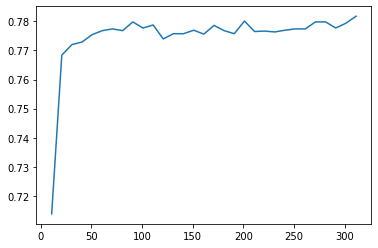

In [35]:
plt.plot(tree_acc_bagging['tree'], tree_acc_bagging['score'])

Оптимальное кол-во деревьев 50-55